In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

1. Выберите задачу для бизнеса, которую Вы хотите решить с помощью методов машинного обучения. На основание бизнес-задачи, поставьте задачу машинного обучения. Подберите дата-сет и оставьте ссылку на него.

Бизнес-задача: Оценка качества авиалиний на основе различных параметров, таких как пунктуальность, обслуживание пассажиров, безопасность и другие.    
Задача машинного обучения: Построение модели для прогнозирования качества авиалиний на основе предоставленного датасета.    
Ссылка на дата-сет: https://www.kaggle.com/datasets/mikhail1681/airline-quality-ratings/data    

In [89]:
full_data = pd.read_csv('Airline Quality Ratings.csv', index_col=0)

In [90]:
print(full_data.shape)

(129880, 23)


In [91]:
# Рандомная выборка 10 тысяч строк
data = full_data.sample(n=12988)

2. Выполните анализ и обработку дата-сета. Этот задание включает в себя
следующие этапы работы с данными:    
*   Первичный анализ данных
*   Предобработку данных
*   Разведывательный анализ данных (Exploratory Data Analysis)
*   Создание признаков (Feature Engineering)
*   Отбор признаков (Feature selection)
*   Подготовка данных (Data Preparation)

Первичный анализ данных

In [92]:
print(data.shape)

(12988, 23)


In [93]:
print(data.columns)

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


In [94]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
42579,Female,30,Returning,Personal,Economy,315,41,76.0,3,3,...,1,4,1,4,4,2,3,4,5,Neutral or Dissatisfied
18532,Female,36,Returning,Business,Economy,253,0,0.0,4,3,...,1,5,2,5,5,5,5,5,4,Satisfied
18136,Male,57,Returning,Business,Business,632,171,164.0,2,2,...,3,5,2,5,5,3,2,2,3,Satisfied
122313,Male,39,First-time,Business,Business,544,0,0.0,4,4,...,4,4,4,4,4,5,4,4,5,Neutral or Dissatisfied
125106,Female,56,Returning,Business,Business,2800,0,0.0,3,3,...,1,3,1,3,1,1,1,1,1,Neutral or Dissatisfied


In [95]:
data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,12988.000000,12988.000000,12988.000000,12952.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,39.297736,1191.365799,15.014244,15.444719,3.064983,2.738913,3.307669,3.232445,2.984986,3.394364,3.438867,3.357484,3.294734,3.219433,3.649138,2.715430,3.371805,3.646289
std,15.160682,998.593374,38.257407,38.861346,1.531255,1.400471,1.271812,1.358428,1.277958,1.291801,1.325992,1.311357,1.320327,1.327216,1.174080,1.323951,1.331298,1.183452
min,7.000000,67.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4817.000000,933.000000,920.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [96]:
data.describe(include=['O'])

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,12988,12988,12988,12988,12988
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,6622,10582,8931,6226,7427


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12988 entries, 42579 to 89513
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  12988 non-null  object 
 1   Age                                     12988 non-null  int64  
 2   Customer Type                           12988 non-null  object 
 3   Type of Travel                          12988 non-null  object 
 4   Class                                   12988 non-null  object 
 5   Flight Distance                         12988 non-null  int64  
 6   Departure Delay                         12988 non-null  int64  
 7   Arrival Delay                           12952 non-null  float64
 8   Departure and Arrival Time Convenience  12988 non-null  int64  
 9   Ease of Online Booking                  12988 non-null  int64  
 10  Check-in Service                        12988 non-null  int

Предобработку данных

In [98]:
data.isnull().sum()

Gender                                     0
Age                                        0
Customer Type                              0
Type of Travel                             0
Class                                      0
Flight Distance                            0
Departure Delay                            0
Arrival Delay                             36
Departure and Arrival Time Convenience     0
Ease of Online Booking                     0
Check-in Service                           0
Online Boarding                            0
Gate Location                              0
On-board Service                           0
Seat Comfort                               0
Leg Room Service                           0
Cleanliness                                0
Food and Drink                             0
In-flight Service                          0
In-flight Wifi Service                     0
In-flight Entertainment                    0
Baggage Handling                           0
Satisfacti

Удаляем ненужные столбцы, которые никак не повлияют на анализ данных

In [99]:
data.drop(['Customer Type', 'Type of Travel', 'Departure Delay', 'Arrival Delay'], axis=1, inplace=True)

In [100]:
data.isnull().sum()

Gender                                    0
Age                                       0
Class                                     0
Flight Distance                           0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                              0
dtype: int64

Разведывательный анализ данных (Exploratory Data Analysis)

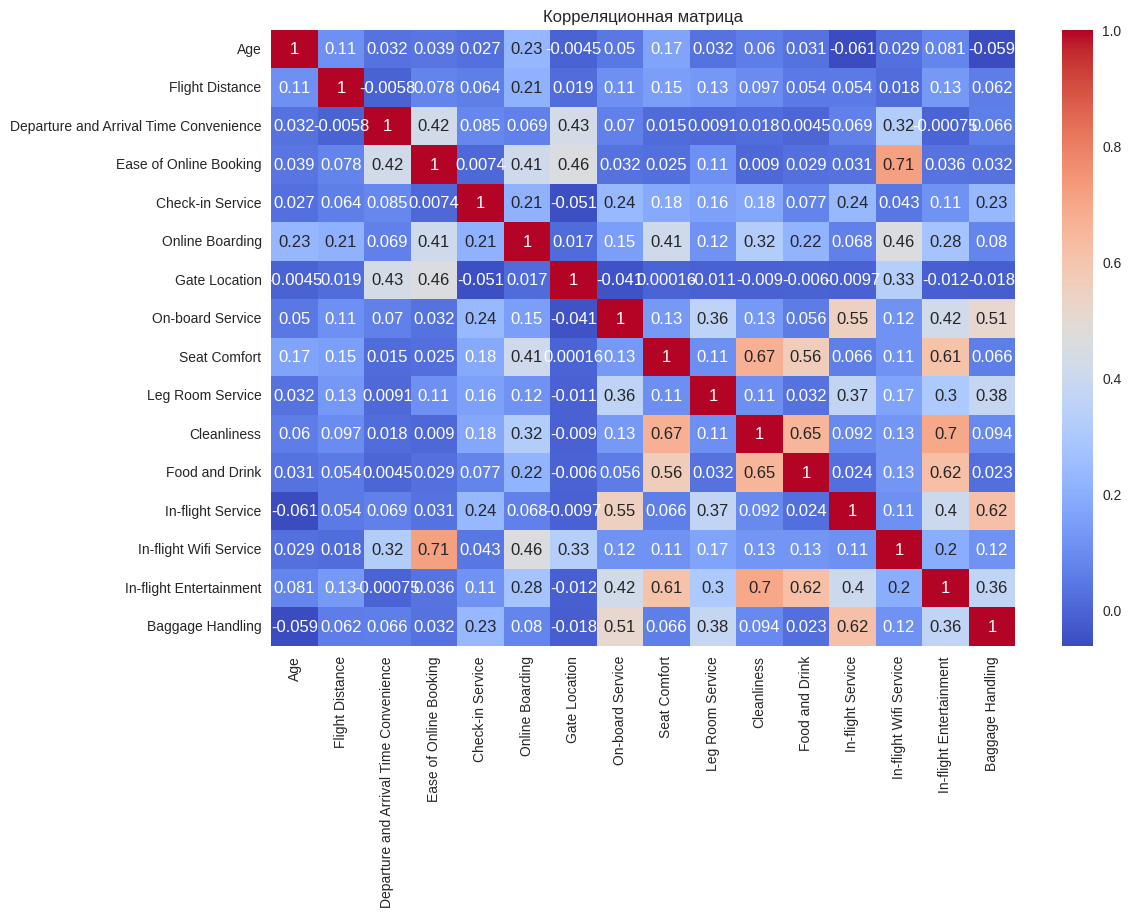

In [101]:
# Корреляция между числовыми признаками
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

<ipython-input-102-6f7aa1385a25>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  Satisfied_bar.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'])


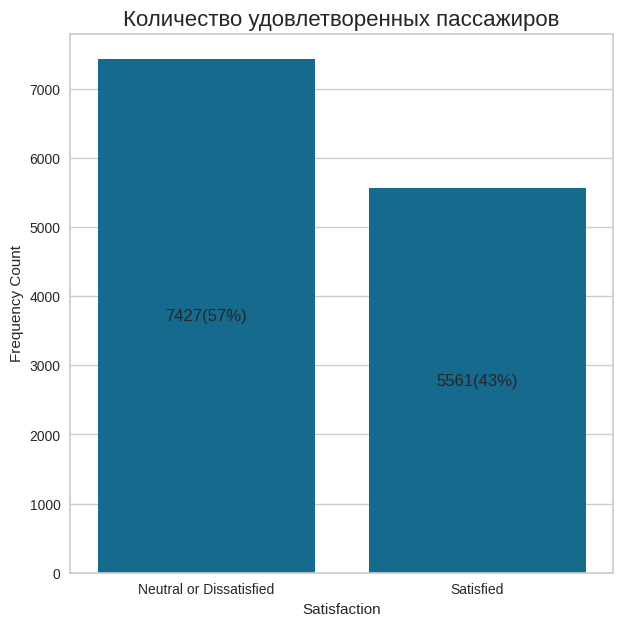

In [102]:
figure, Satisfied_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= data["Satisfaction"].value_counts().index, y = data["Satisfaction"].value_counts(), ax = Satisfied_bar)
Satisfied_bar.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'])
Satisfied_bar.set_ylabel('Frequency Count')
Satisfied_bar.set_title('Количество удовлетворенных пассажиров', fontsize = 16)

for patch in Satisfied_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    Satisfied_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(data.Satisfaction))+')',
               horizontalalignment='center', verticalalignment='center')

In [103]:
data.Satisfaction.value_counts()

Satisfaction
Neutral or Dissatisfied    7427
Satisfied                  5561
Name: count, dtype: int64

<Axes: xlabel='Satisfaction', ylabel='count'>

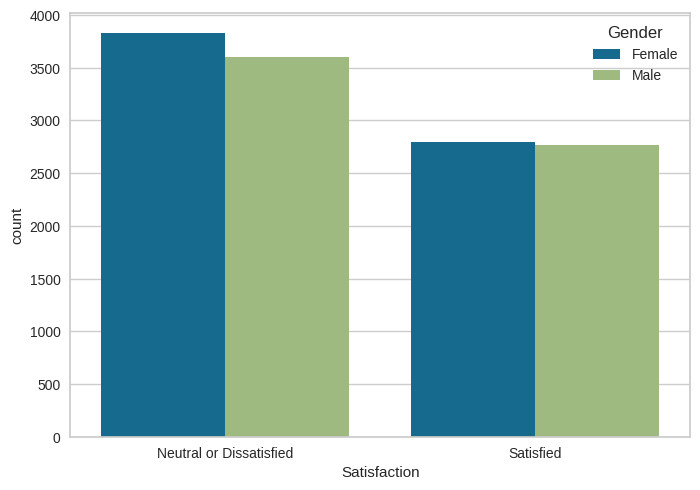

In [104]:
sns.countplot(x='Satisfaction', data=data, hue='Gender')

<Axes: xlabel='Satisfaction', ylabel='count'>

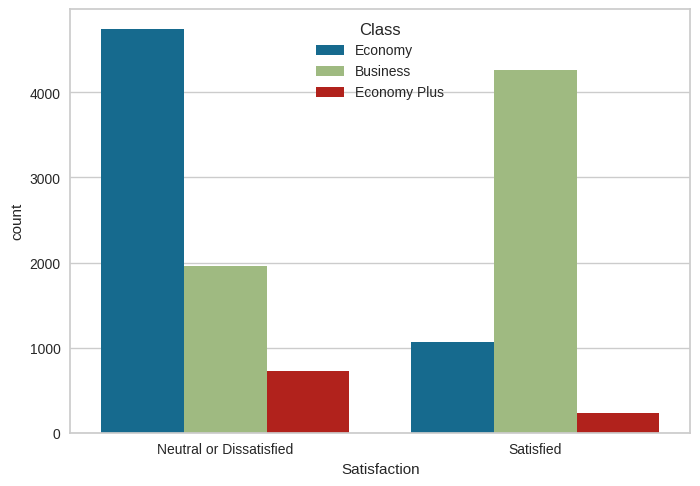

In [105]:
sns.countplot(x='Satisfaction', data=data, hue='Class')

Преобразуем бинарный тип категориальных атрибутов столбец Satisfaction, где 'Neutral or Dissatisfied' становится 0, а 'Satisfied' - 1

In [106]:
from sklearn.preprocessing import LabelEncoder
LE_Satisfaction = LabelEncoder()
data.Satisfaction = LE_Satisfaction.fit_transform(data.Satisfaction)

Male - 1, Female - 0

In [107]:
# from sklearn.preprocessing import LabelEncoder
# LE_gender = LabelEncoder()
# data.Gender = LE_gender.fit_transform(data.Gender)

In [108]:
# data.Class.replace({
#     'Business': 1, 'Economy Plus': 2, 'Economy' : 3
# }, inplace=True)

In [109]:
data.head()

,Gender,Age,Class,Flight Distance,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,
42579,Female,30,Economy,315,3,3,3,3,3,1,4,1,4,4,2,3,4,5,0
18532,Female,36,Economy,253,4,3,3,4,4,1,5,2,5,5,5,5,5,4,1
18136,Male,57,Business,632,2,2,5,5,2,3,5,2,5,5,3,2,2,3,1
122313,Male,39,Business,544,4,4,3,4,4,4,4,4,4,4,5,4,4,5,0
125106,Female,56,Business,2800,3,3,4,2,3,1,3,1,3,1,1,1,1,1,0


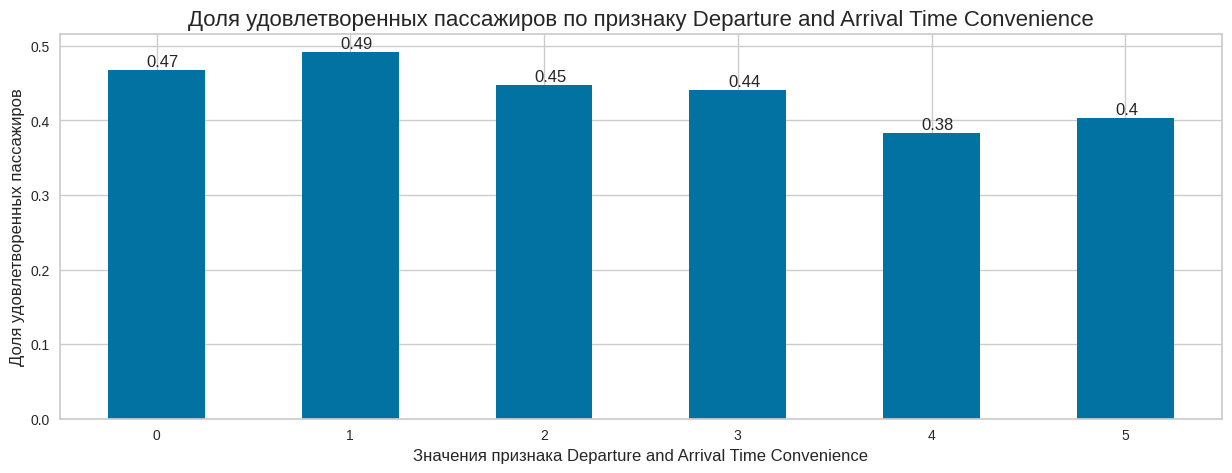

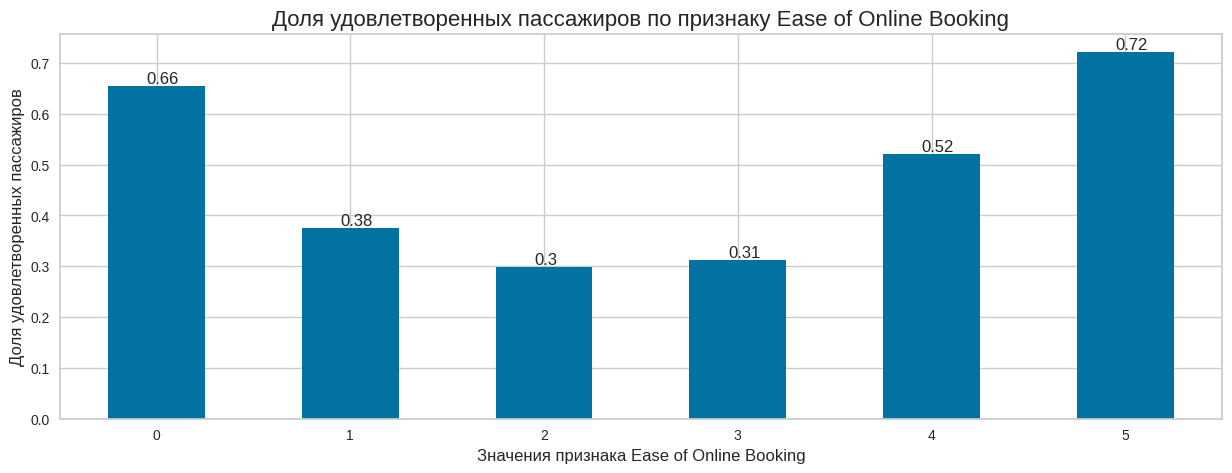

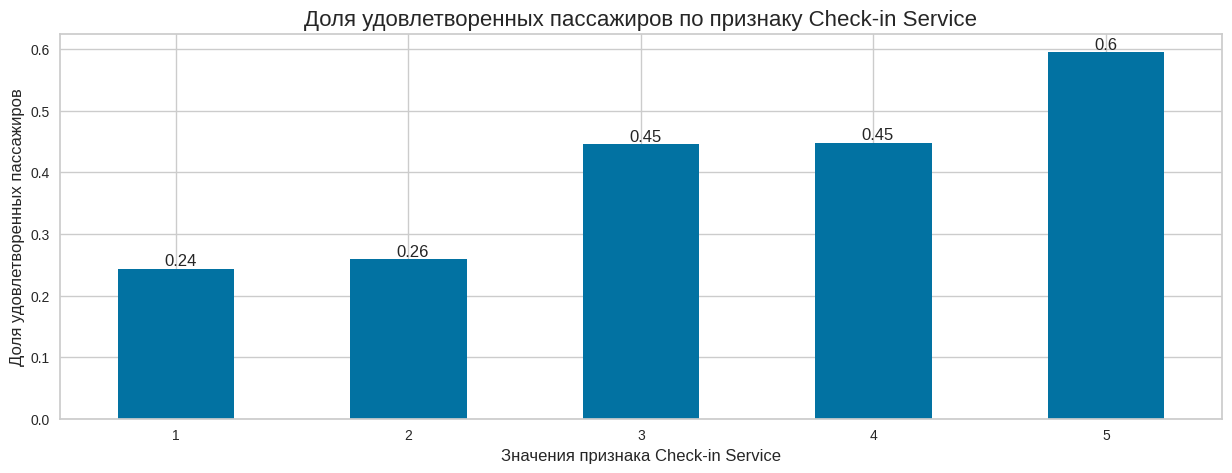

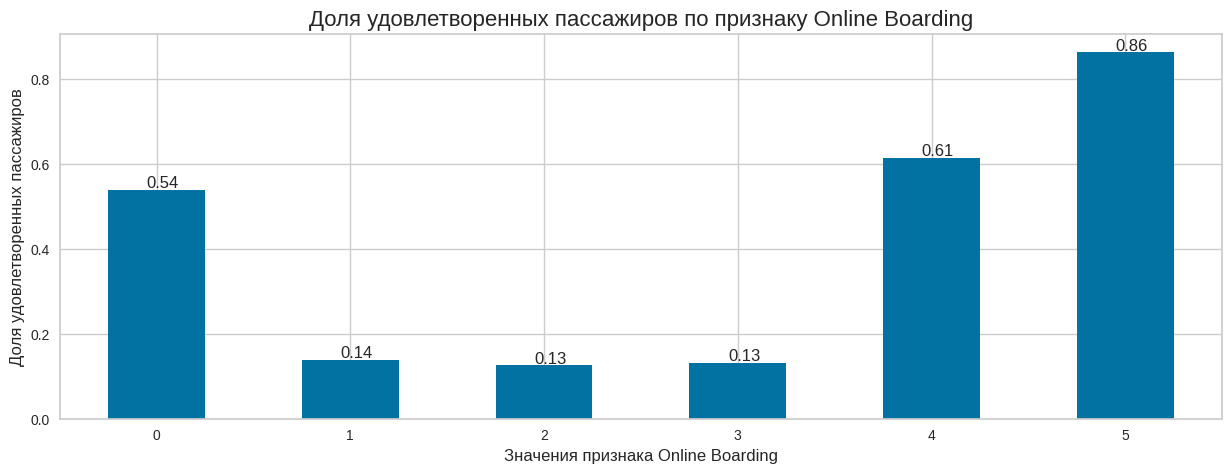

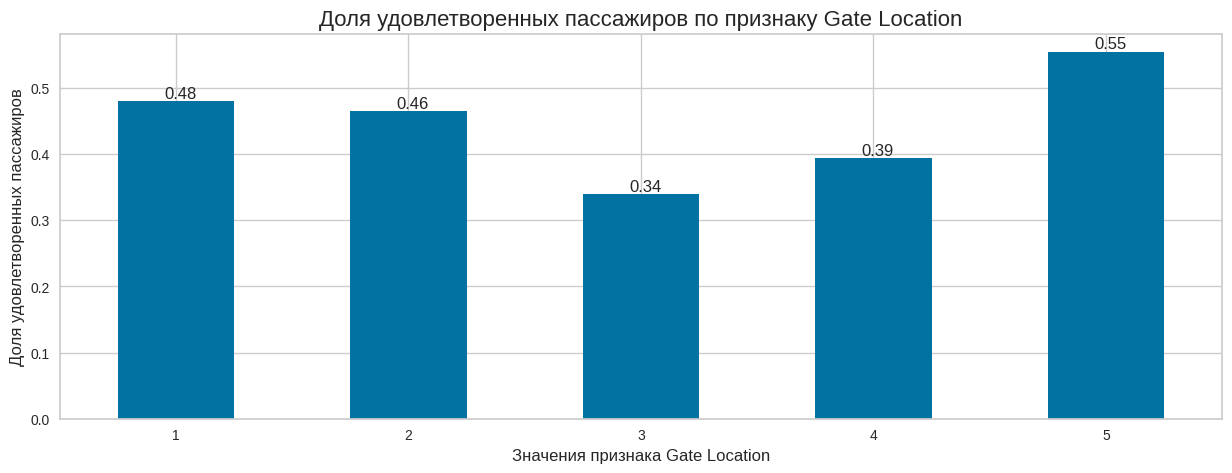

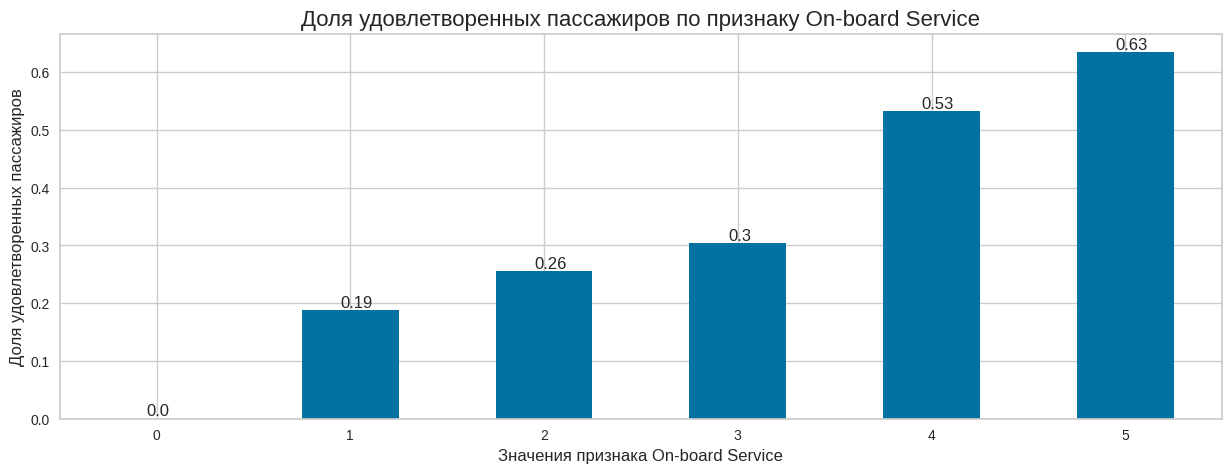

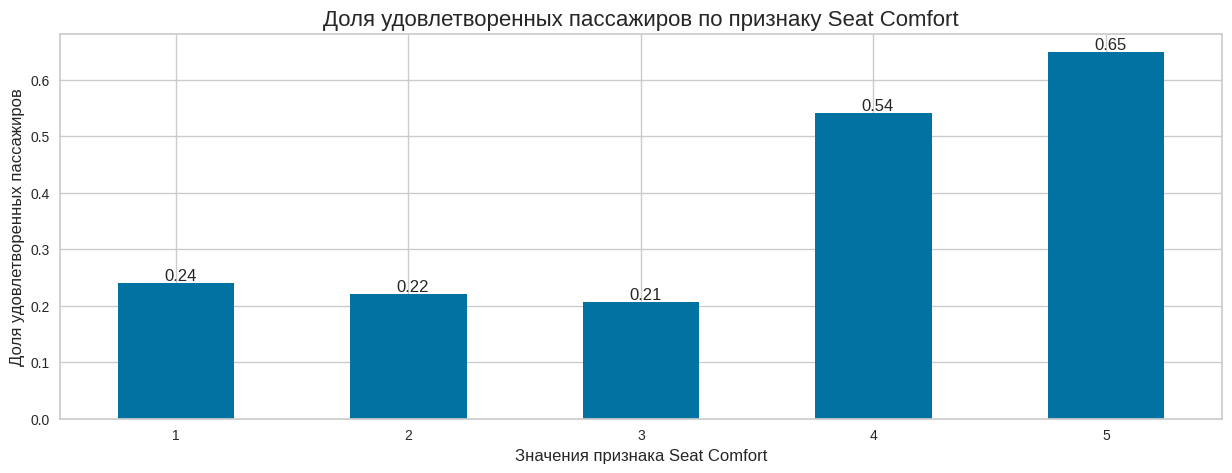

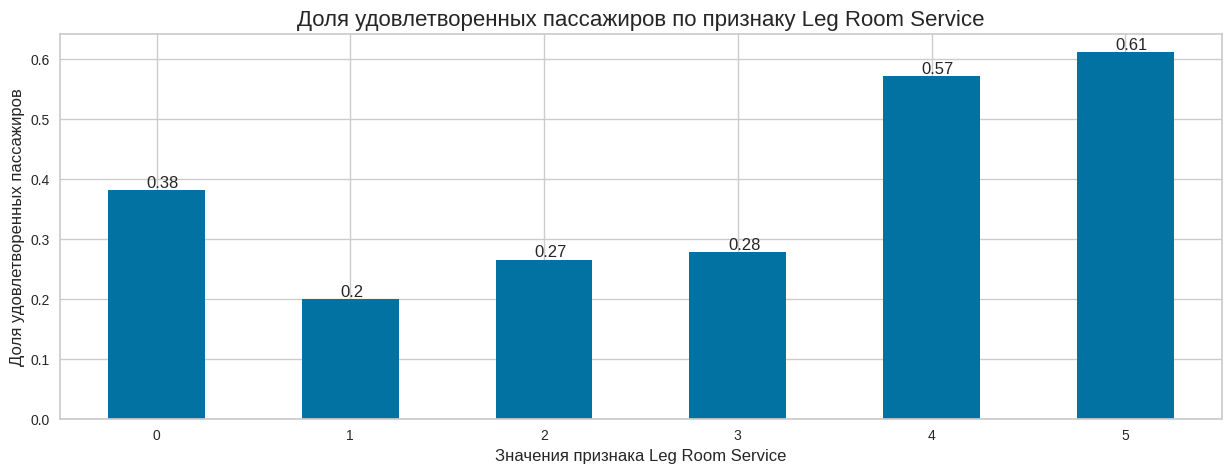

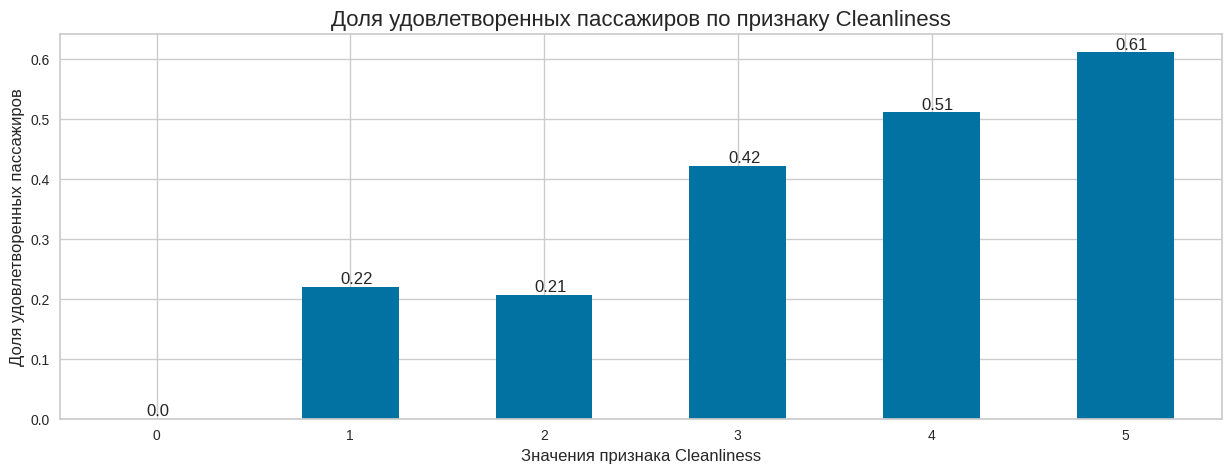

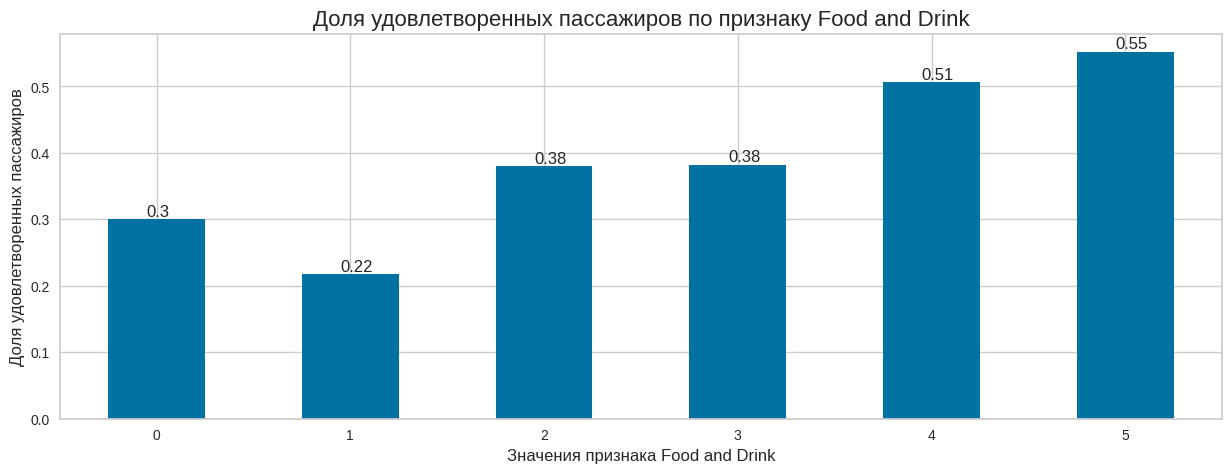

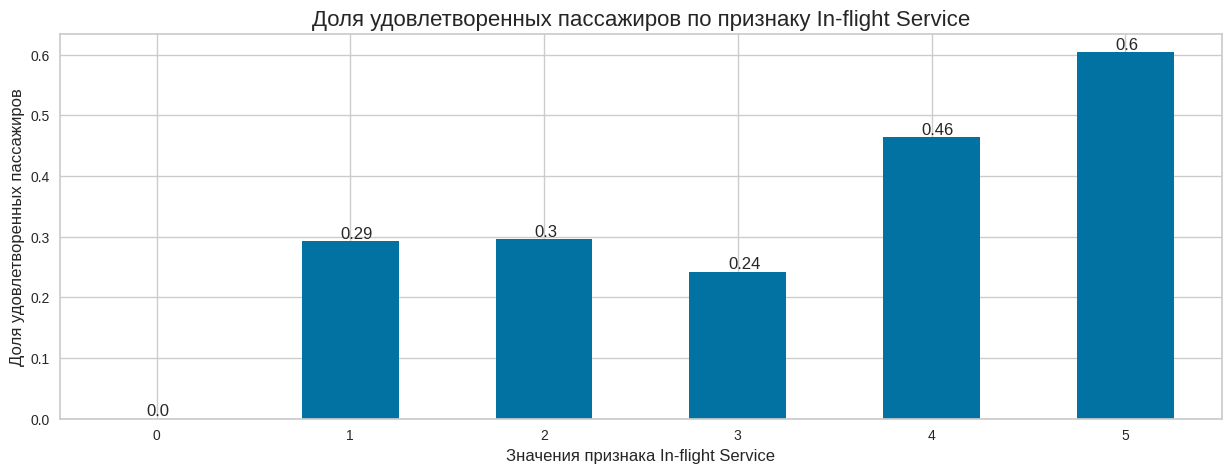

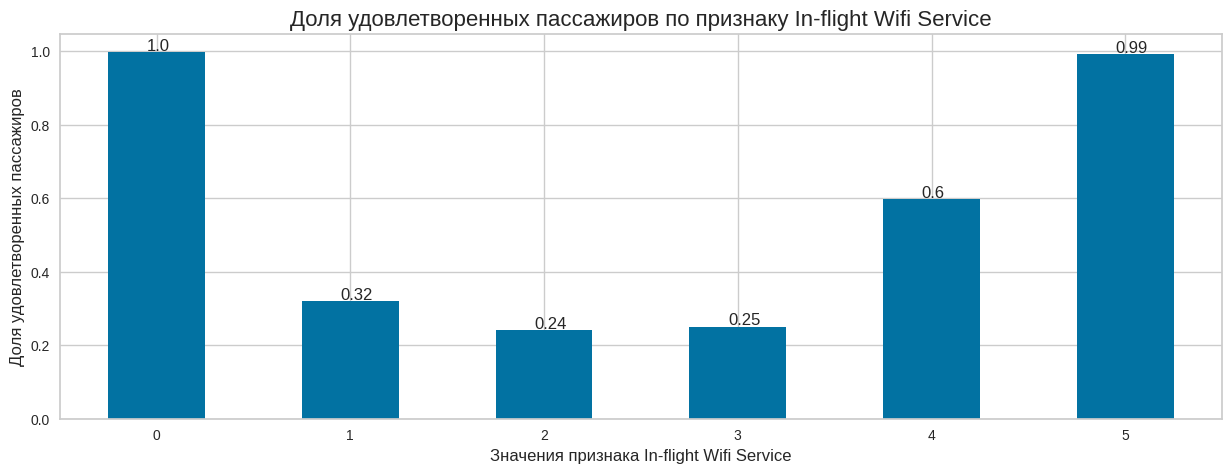

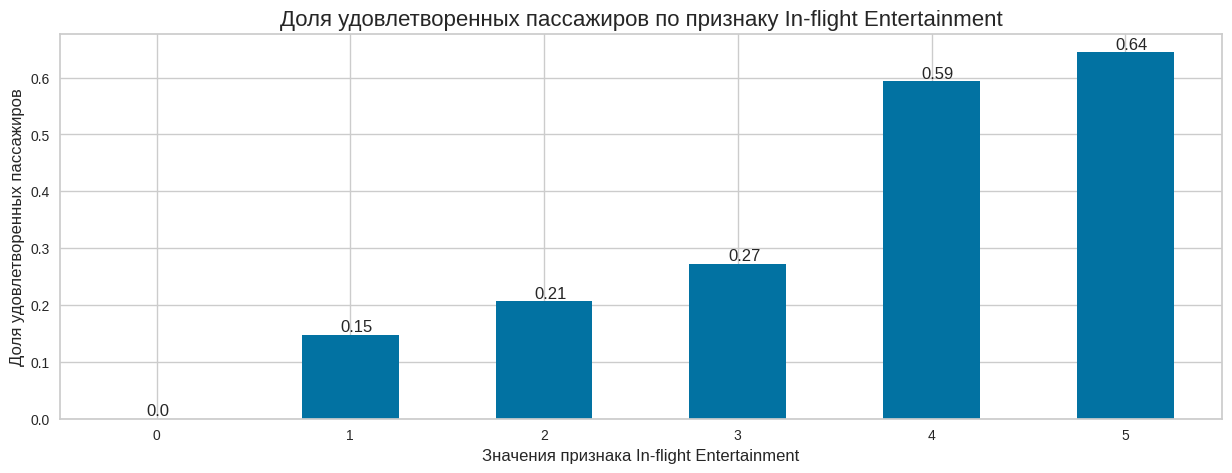

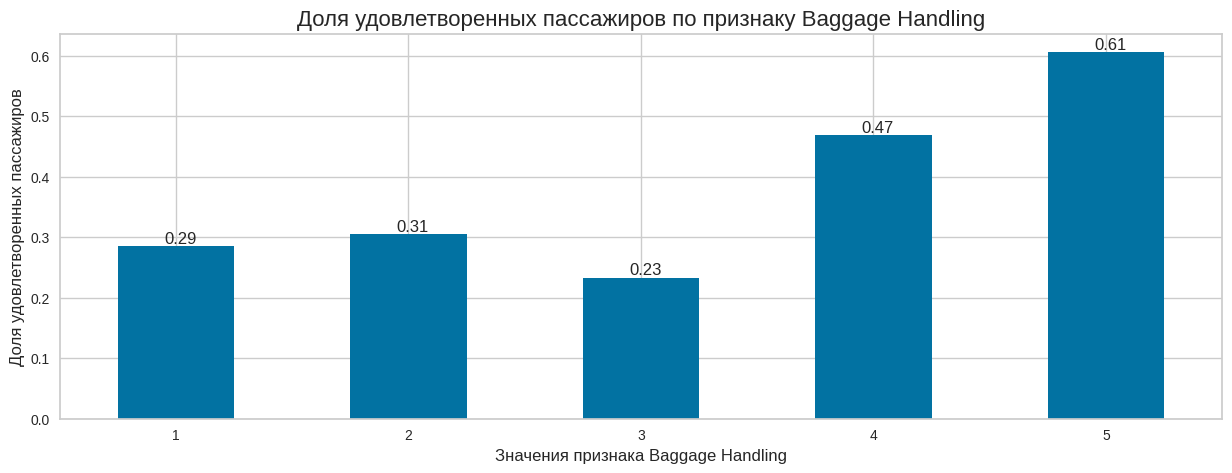

In [110]:
columns_to_look = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

for column in columns_to_look:
    pivot = data.pivot_table(index=column, values='Satisfaction', aggfunc='mean')

    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля удовлетворенных пассажиров по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля удовлетворенных пассажиров', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))

    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

Подготовка данных (Data Preparation)

In [111]:
data.drop(['Gender', 'Age', 'Class', 'Flight Distance'], axis=1, inplace=True)

In [112]:
target = 'Satisfaction'
y = data[target]
X = data.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [113]:
print(y.value_counts())

Satisfaction
0    7427
1    5561
Name: count, dtype: int64


In [114]:
len(y.value_counts())

2

3. Выберите несколько метрик для оценки моделей машинного обучения.
Обоснуйте свой выбор и дайте интерпретацию метрик для бизнес-задачи.

Выбор метрик для оценки моделей

Для оценки моделей классификации будут использованы следующие метрики:

*   Accuracy - это метрика, которая измеряет долю правильно классифицированных объектов относительно общего числа объектов.
*   Precision - это метрика, которая измеряет долю правильно предсказанных положительных классов относительно всех объектов, которые модель предсказала как положительные.
*   Recall (полнота) - это метрика, которая измеряет долю правильно предсказанных положительных классов относительно всех истинных положительных классов.
*  F1 (F1 Score) - это гармоническое среднее между Precision и Recall, которое представляет собой компромисс между ними. F1 Score объединяет Precision и Recall в одну метрику и обычно используется в задачах классификации для оценки сбалансированности модели.





In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

4. Постройте 4 модели машинного обучения для решение поставленной задачи.

In [116]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(max_iter=10000000).fit(X_train, y_train)

log_y_train_pred = model_log.predict(X_train)
log_y_pred = model_log.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, log_y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, log_y_pred))

Train score = 0.8107
Test score = 0.8121


In [117]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=1).fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
y_pred = tree_model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8706
Test score = 0.8753


In [127]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

KNN_train_prediction = KNN_model.predict(X_train)
KNN_prediction = KNN_model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, KNN_train_prediction))
print("Test score = %.4f" % accuracy_score(y_test, KNN_prediction))

Train score = 0.9276
Test score = 0.9051


In [119]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

SVC_train_prediction = SVC_model.predict(X_train)
SVC_prediction = SVC_model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, SVC_train_prediction))
print("Test score = %.4f" % accuracy_score(y_test, SVC_prediction))

Train score = 0.9110
Test score = 0.9008


In [120]:
# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Линейная регрессия
log = LogisticRegression(max_iter=10000000)
log.fit(X_train, y_train)
log_metrics = evaluate_model(log, X_test, y_test)

# Дерево решений
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)
dt_metrics = evaluate_model(dt, X_test, y_test)

# Случайный лес
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_metrics = evaluate_model(knn, X_test, y_test)

# Градиентный бустинг
svc = SVC(kernel='poly', degree=3, C=1)
svc.fit(X_train, y_train)
svc_metrics = evaluate_model(svc, X_test, y_test)

# Вывод метрик
models_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'KNeighbors Classifier', 'SVC'],
    'accuracy': [log_metrics[0], dt_metrics[0], knn_metrics[0], svc_metrics[0]],
    'precision': [log_metrics[1], dt_metrics[1], knn_metrics[1], svc_metrics[1]],
    'recall': [log_metrics[2], dt_metrics[2], knn_metrics[2], svc_metrics[2]],
    'f1': [log_metrics[3], dt_metrics[3], knn_metrics[3], svc_metrics[3]]
})

print(models_metrics)

                      Model  accuracy  precision    recall        f1
0       Logistic Regression  0.812134   0.771837  0.769520  0.770677
1  Decision Tree Classifier  0.842932   0.805349  0.813814  0.809559
2     KNeighbors Classifier  0.905143   0.918301  0.843844  0.879499
3                       SVC  0.900832   0.888462  0.867117  0.877660


In [121]:
# Определение лучшей модели по accuracy
best_model_name = models_metrics.loc[models_metrics['accuracy'].idxmax(), 'Model']
print(f"Best model based on accuracy: {best_model_name}")

Best model based on accuracy: KNeighbors Classifier


5. Проведите диагностику лучшей модели из пункта 4.

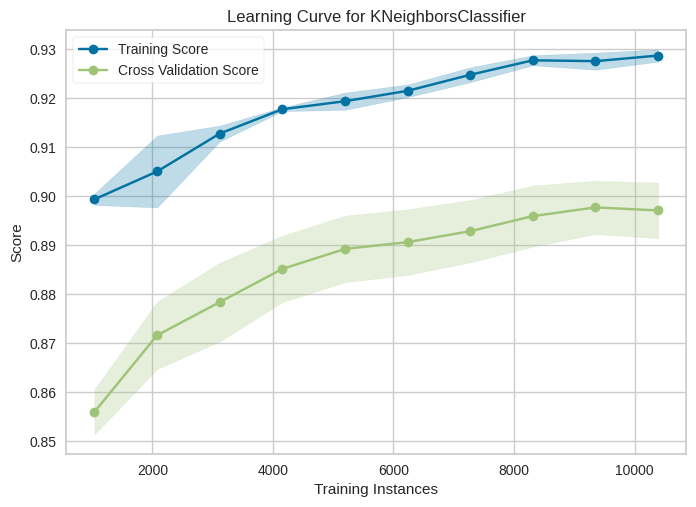

In [122]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(KNeighborsClassifier(n_neighbors=5), train_sizes=np.linspace(0.1, 1.0, 10)).fit(X, y).show()

Так как train score показывает отличные результаты (около 93%), то и test score высокий (около 90%) и можно придти к выводу, что модель обучилась хорошо.

6. Сделайте подбор гиперпараметров для лучшей модели из пункта 4.

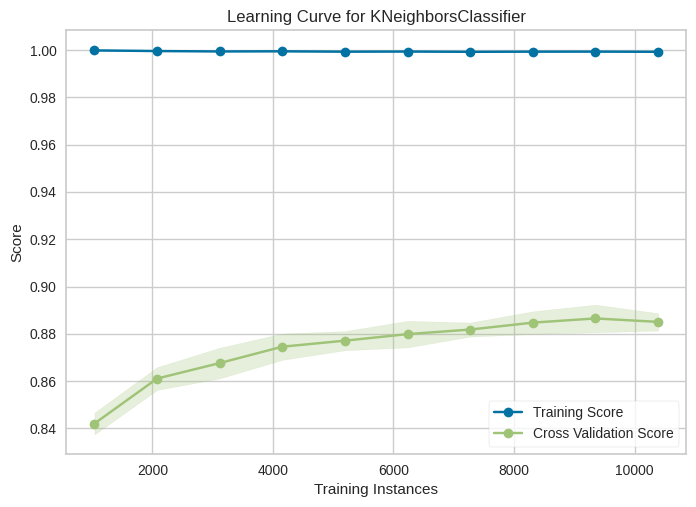

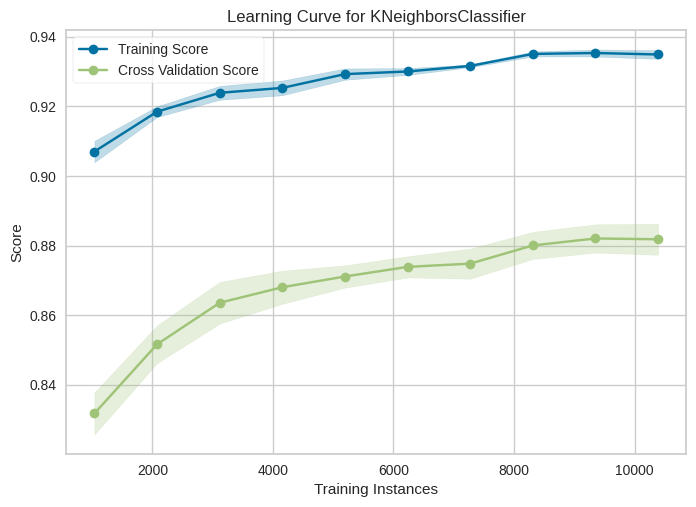

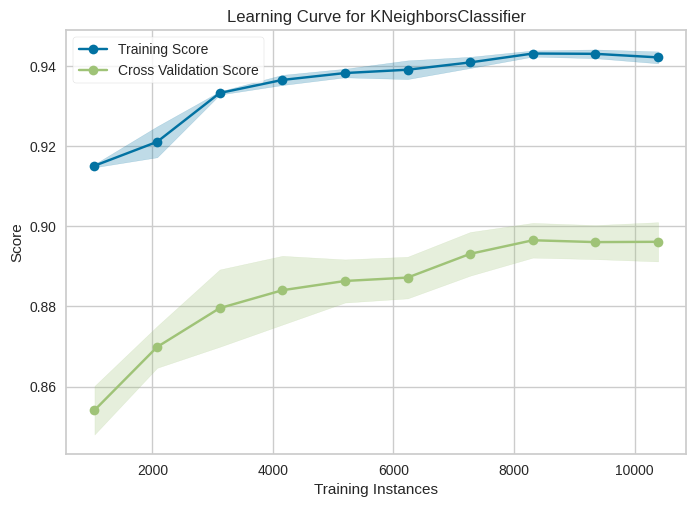

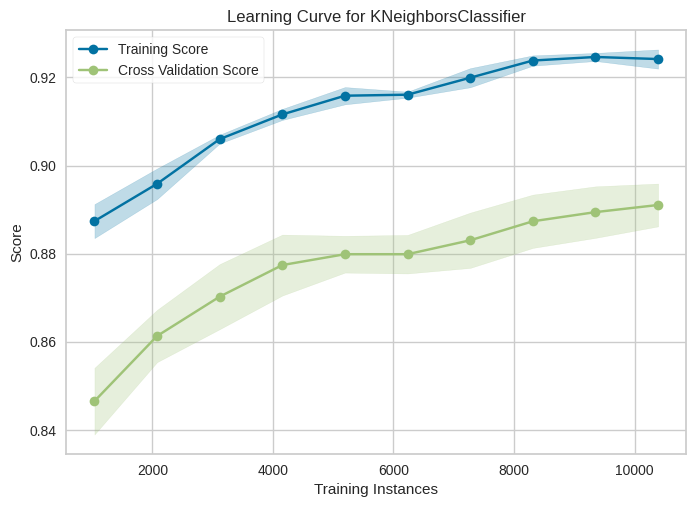

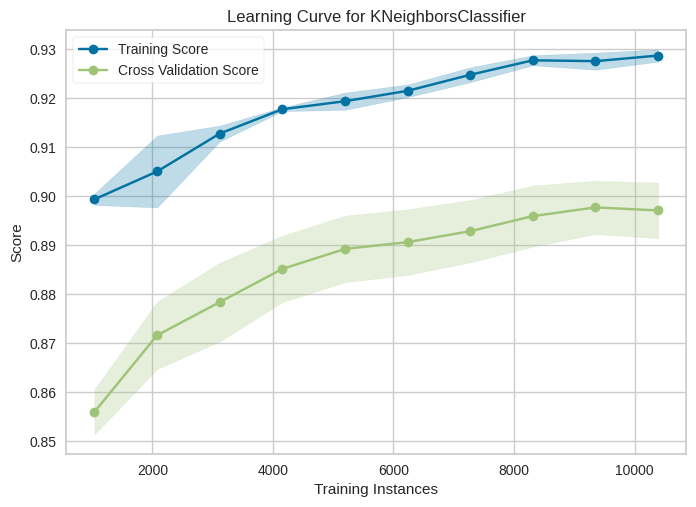

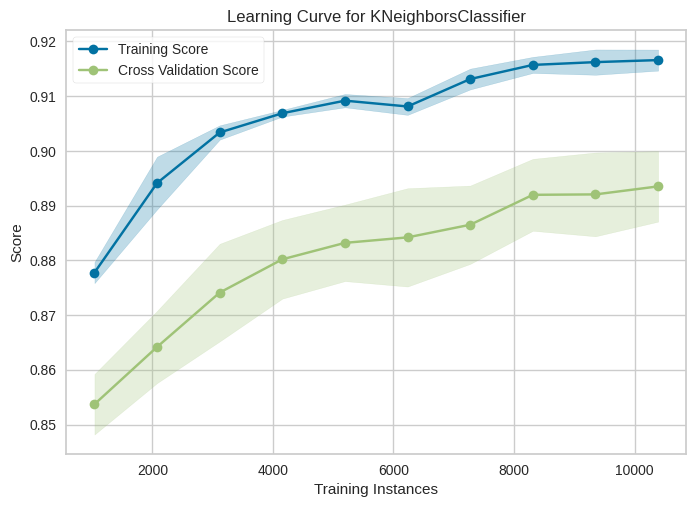

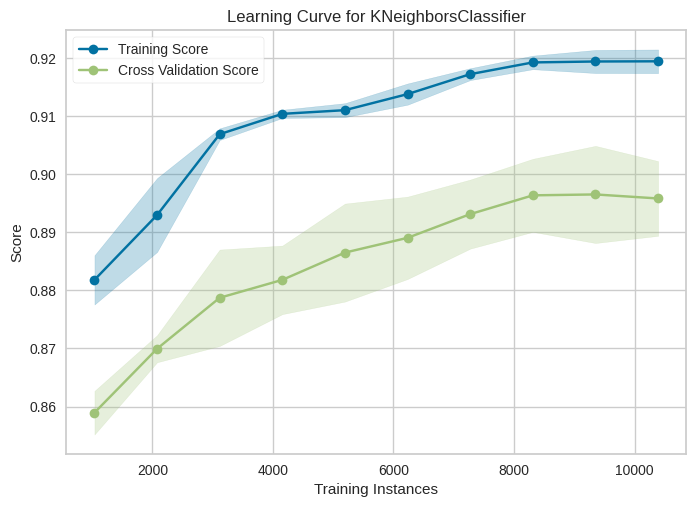

In [123]:
for i in range(1,8):
  visualizer = LearningCurve(KNeighborsClassifier(n_neighbors=i), train_sizes=np.linspace(0.1, 1.0, 10)).fit(X, y).show()

при первой итерации заметно, что модель переобучается, с увеличением числа ближайших соседей ситуация меняется, переобучение исчезает и график нормализуется. Входных данных хватает для полного обучения

7. Постройте ансамблевую модель машинного обучения.

In [124]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=12)
ada_model.fit(X_train, y_train)

ada_train_prediction = ada_model.predict(X_train)
ada_prediction = ada_model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, ada_train_prediction))
print("Test score = %.4f" % accuracy_score(y_test, ada_prediction))

Train score = 0.9601
Test score = 0.9301


Адаптивный бустинг (AdaBoost)

Данный алгоритм сначала обучает первую базовую модель(деревья решений) на тренировочном наборе. Относительный вес некорректно предсказанных значений увеличивается. На вход второй базовой модели подаются обновлённые веса и модель обучается, после чего вырабатываются прогнозы и цикл повторяется.  

Adaboost обновляет веса объектов на каждой итерации. Веса хорошо классифицированных объектов уменьшаются относительно весов неправильно классифицированных объектов. Модели, которые работают лучше, имеют больший вес в окончательной модели ансамбля.

Выводы: Мы проанализировали выбранный датасет, обработали и подготовили данные для обучения. Построили несколько моделей и выбрали наилучшую. Результаты работы моделей отличные, точность определения класса не ниже 81%